In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
data = datasets.load_diabetes()

In [4]:
cols = ['age', 'sex', 'bmi', 'bp', 'tcell', 'ldl', 'hdl', 'tch', 
       'ltg', 'glu']

In [6]:
df_x = pd.DataFrame(data=data['data'], columns=cols)
df_y = pd.DataFrame(data=data['target'], columns=['outcome'])

In [10]:
lm = sm.OLS(df_y, df_x)
res = lm.fit()

In [12]:
lm_sk = LinearRegression(fit_intercept=True)
lm_sk.fit(df_x, df_y)

LinearRegression()

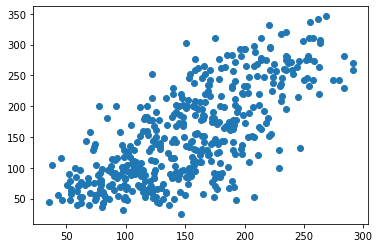

In [16]:
plt.scatter(lm_sk.predict(df_x), df_y)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(df_x)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=25)
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

param_grid = {'alpha': [0.01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]}
rr = Ridge(normalize=True)
la = Lasso(normalize=True, max_iter=1000)
rr0 = Ridge(alpha=0)

rr_search = GridSearchCV(rr, param_grid=param_grid, cv=5)
la_search = GridSearchCV(la, param_grid=param_grid, cv=5)

rr_search.fit(X_train, y_train)
la_search.fit(X_train, y_train)
rr0.fit(X_train, y_train)

/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2823.880715104111, tolerance: 145.51775780590714
  model = cd_fast.enet_coordinate_descent(
/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.35226e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0)

In [25]:
print(rr_search.best_score_)
print(la_search.best_score_)
print(rr0.score(X_train, y_train))

0.46057851209387957
0.4869749818729151
0.6530476405381935


In [27]:
print(rr_search.score(X_test, y_test))
print(la_search.score(X_test, y_test))
print(rr0.score(X_test, y_test))

0.4401458415712498
0.4105534827996288
0.15643703221116612


In [33]:
ss = StandardScaler()
rr = Ridge()

pipe = Pipeline(steps=[('scaling', ss), ('regression', rr)])
pipe_grid = pipe_grid = {'regression__alpha': [0.01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]}

pipe_search = GridSearchCV(pipe, param_grid=pipe_grid, cv=5)
pipe_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('regression', Ridge())]),
             param_grid={'regression__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                               50, 100, 500, 1000]})

In [34]:
pipe_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('regression', Ridge(alpha=100))])